# TTT4185 Machine learning for Speech technology

## Computer assigment 3b:  Regression analysis

Regression analysis is used to estimate/measure the relationship between an _independent_ variable, say $x$, and a _dependent_ variable, say $y$. One of the simplest regression problems is 
\begin{equation}
y = ax + b
\end{equation}
where $a$ and $b$ are constants. In practice our observations will be contaminated by noise, so we have
\begin{equation}
y = ax + b + n,
\end{equation}
where $n$ is noise, eg. measurement errors. This particular problem is called _linear regression_.

We will have a look at _non-linear regression_, using deep neural networks. Here we are looking at general regression problems in the form 
\begin{equation}
y = f(x) + n.
\end{equation}

We generate our data according to the function $f(x) = x^2 + \cos(20x) \text{ sign}(x)$, obtaining a set of observations $\{(x_i,y_i)\}$.

Then we assume we do not know the underlying function and we try to recover and approximation of $f$ only using the observations $\{(x_i,y_i)\}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

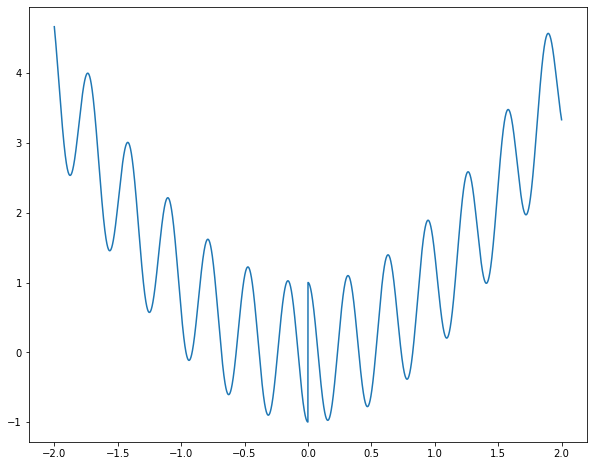

In [2]:
# Define function
def f(x):
    return x**2 + np.cos(20*x)*np.sign(x)

# Setup some simulation parameters
# Number of observations
N = 5000

# Plot a "clean" version of the relationship between x and y
plt.figure(figsize=(10, 8))
x = np.linspace(-2,2,N)
plt.plot(x,f(x))
plt.show()

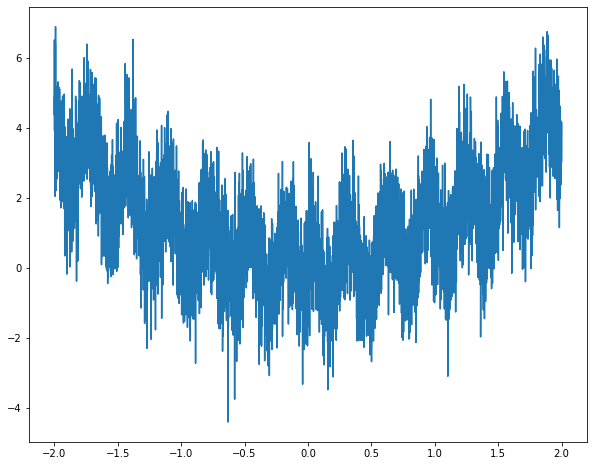

In [3]:
# Create a noise version of the observations
y = f(x) + np.random.randn(len(x))
plt.figure(figsize=(10, 8))
plt.plot(x,y)
plt.show()

One way to perform regression is to assume that the data is generated using a set of functions from a cerain family, for example polynomials of order $p$,
\begin{equation}
\hat f(x) = a_0 + a_1 x + a_2 x^2 \ldots a_p x^p.
\end{equation}
Then regression corresponds to fitting the parameters in the model. Let us see how this works out before using our neural networks.

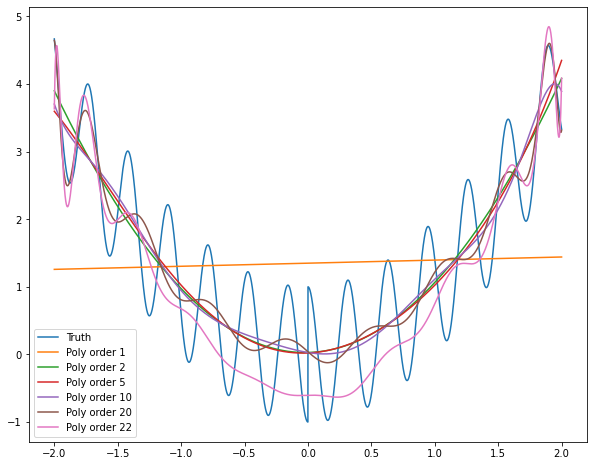

In [8]:
# Give a set of polynomial orders to try
P = [1, 2, 5, 10, 20, 22]

# Define estimator function. Arguments are inout variable, observation and polynomial order
# Returns a set of polynomial coefficients
def reg_estimator(x,y,p):
    # Use simple ls approach
    N = len(x)
    H = np.zeros((N,p+1))
    for col in range(p+1):
        H[:,col] = x**col
    iHtH = np.linalg.inv(np.dot(H.T,H))
    theta = np.dot(np.dot(iHtH,H.T),y)
    return theta

# Computes fx) = c_0 + c_1x + c_2 x^2 ... c_p x^p
def poly(x, C):
    # compute p(x) for coeffs in c
    y = 0*x
    for p, c in enumerate(C):
        y += c*x**p        
    return y

plt.figure(figsize=(10,8))
plt.plot(x,f(x),label="Truth")
for p in P:
    C = reg_estimator(x,y,p)
    plt.plot(x,poly(x,C),label="Poly order " + str(p))
plt.legend()
plt.show()

## Problem 1
Play with different $p$ to see how close you can get to the true function.

Note: Very high $p$ will give numerical problems.

Did it above.

In what follows we will use a deep neural network to approximate $f$. We set this up below

In [9]:
# Ceate a model with a single hidden layer. Note that input and output has
# dimension one
M = 512
model = keras.Sequential([
    keras.layers.Dense(M, activation=tf.nn.relu, input_dim=1),
    keras.layers.Dense(1)
])

model.summary()
# Train the model
model.compile(loss='mean_squared_error',
              optimizer="adam",
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________


We train the network by using $x$ as an input and the squared error between the network output $\hat y$ and the observed value $y$ as a loss
\begin{equation}
 L = \frac{1}{N} \sum_n (\hat y - y)^2
\end{equation}

We first try our network on clean data to check if it works.

In [10]:
# train the model
history = model.fit(x, f(x), epochs=1000, batch_size=128, verbose=True)

=======] - 0s 8us/sample - loss: 0.4669 - accuracy: 0.0000e+00
Epoch 823/1000
5000/5000 [==============================] - 0s 8us/sample - loss: 0.4647 - accuracy: 0.0000e+00
Epoch 824/1000
5000/5000 [==============================] - 0s 8us/sample - loss: 0.4674 - accuracy: 0.0000e+00
Epoch 825/1000
5000/5000 [==============================] - 0s 8us/sample - loss: 0.4684 - accuracy: 0.0000e+00
Epoch 826/1000
5000/5000 [==============================] - 0s 8us/sample - loss: 0.4650 - accuracy: 0.0000e+00
Epoch 827/1000
5000/5000 [==============================] - 0s 8us/sample - loss: 0.4646 - accuracy: 0.0000e+00
Epoch 828/1000
5000/5000 [==============================] - 0s 8us/sample - loss: 0.4658 - accuracy: 0.0000e+00
Epoch 829/1000
5000/5000 [==============================] - 0s 9us/sample - loss: 0.4640 - accuracy: 0.0000e+00
Epoch 830/1000
5000/5000 [==============================] - 0s 8us/sample - loss: 0.4646 - accuracy: 0.0000e+00
Epoch 831/1000
5000/5000 [===============

Using the variable `history`, plot the evolution of the loss during training. 

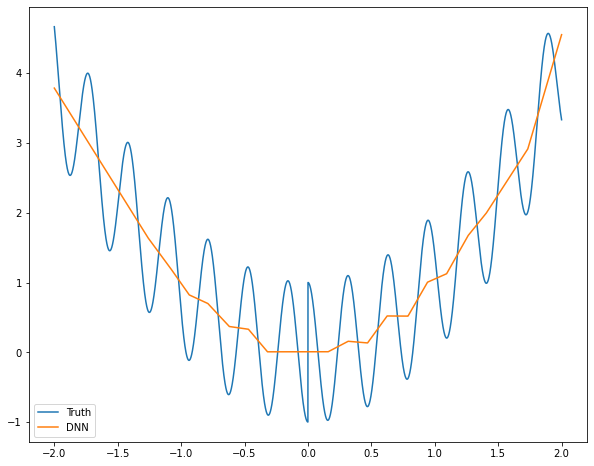

In [7]:
# Compute \hat y from the network and compare this to the true f(x)
z = model.predict(x)
plt.figure(figsize=(10,8))
plt.plot(x,f(x),label="Truth")
plt.plot(x,z,label="DNN")
plt.legend()
plt.show()

## Problem 2
Try increasing the number of nodes in the network to see if the results can be improved.

racy: 0.0000e+00
Epoch 824/1000
5000/5000 [==============================] - 0s 9us/sample - loss: 0.4695 - accuracy: 0.0000e+00
Epoch 825/1000
5000/5000 [==============================] - 0s 10us/sample - loss: 0.4714 - accuracy: 0.0000e+00
Epoch 826/1000
5000/5000 [==============================] - 0s 10us/sample - loss: 0.4735 - accuracy: 0.0000e+00
Epoch 827/1000
5000/5000 [==============================] - 0s 10us/sample - loss: 0.4674 - accuracy: 0.0000e+00
Epoch 828/1000
5000/5000 [==============================] - 0s 10us/sample - loss: 0.4715 - accuracy: 0.0000e+00
Epoch 829/1000
5000/5000 [==============================] - 0s 10us/sample - loss: 0.4683 - accuracy: 0.0000e+00
Epoch 830/1000
5000/5000 [==============================] - 0s 10us/sample - loss: 0.4712 - accuracy: 0.0000e+00
Epoch 831/1000
5000/5000 [==============================] - 0s 10us/sample - loss: 0.4710 - accuracy: 0.0000e+00
Epoch 832/1000
5000/5000 [==============================] - 0s 10us/sample - los

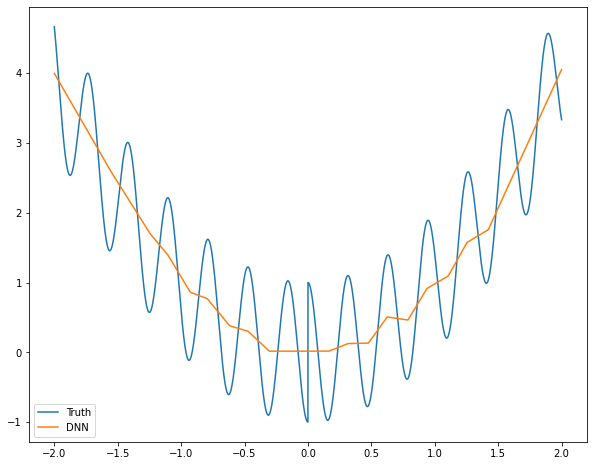

In [11]:
# Ceate a model with a single hidden layer. Note that input and output has
# dimension one
M = 1024
model = keras.Sequential([
    keras.layers.Dense(M, activation=tf.nn.relu, input_dim=1),
    keras.layers.Dense(1)
])
# Train the model
model.compile(loss='mean_squared_error',
              optimizer="adam",
              metrics=['accuracy'])
history = model.fit(x, f(x), epochs=1000, batch_size=128, verbose=True)
# Compute \hat y from the network and compare this to the true f(x)
z = model.predict(x)
plt.figure(figsize=(10,8))
plt.plot(x,f(x),label="Truth")
plt.plot(x,z,label="DNN")
plt.legend()
plt.show()

Next we will use a deep network with more than one hidden layer.

In [9]:
# Create a model with multiple hidden layers. Note that input and output has
# dimension one
M = 16
model = keras.Sequential([
    keras.layers.Dense(M, activation=tf.nn.relu, input_dim=1),
    keras.layers.Dense(M, activation=tf.nn.relu),
    keras.layers.Dense(M, activation=tf.nn.relu),
    keras.layers.Dense(M, activation=tf.nn.relu),
    keras.layers.Dense(1)
])
model.summary()

# Train the model
model.compile(loss='mean_squared_error',
              optimizer="adam",
              metrics=['accuracy'])

history = model.fit(x, f(x), epochs=1000, batch_size=128, verbose=True)

======] - 0s 7us/sample - loss: 0.2634 - accuracy: 0.0000e+00
Epoch 823/1000
5000/5000 [==============================] - 0s 7us/sample - loss: 0.2589 - accuracy: 0.0000e+00
Epoch 824/1000
5000/5000 [==============================] - 0s 7us/sample - loss: 0.2596 - accuracy: 0.0000e+00
Epoch 825/1000
5000/5000 [==============================] - 0s 8us/sample - loss: 0.2590 - accuracy: 0.0000e+00
Epoch 826/1000
5000/5000 [==============================] - 0s 7us/sample - loss: 0.2654 - accuracy: 0.0000e+00
Epoch 827/1000
5000/5000 [==============================] - 0s 8us/sample - loss: 0.2733 - accuracy: 0.0000e+00
Epoch 828/1000
5000/5000 [==============================] - 0s 7us/sample - loss: 0.2599 - accuracy: 0.0000e+00
Epoch 829/1000
5000/5000 [==============================] - 0s 8us/sample - loss: 0.2572 - accuracy: 0.0000e+00
Epoch 830/1000
5000/5000 [==============================] - 0s 8us/sample - loss: 0.2558 - accuracy: 0.0000e+00
Epoch 831/1000
5000/5000 [================

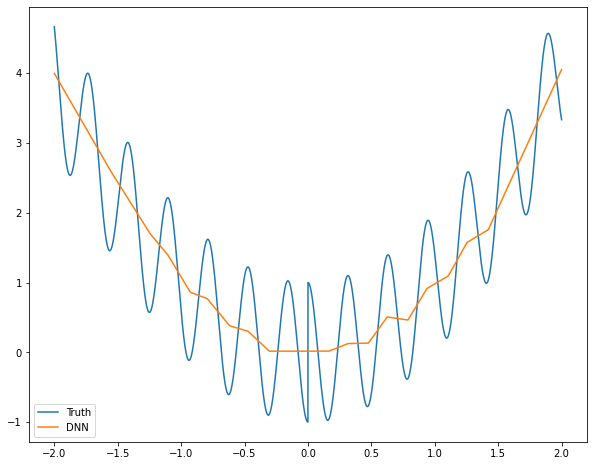

In [12]:
z = model.predict(x)
plt.figure(figsize=(10,8))
plt.plot(x,f(x),label="Truth")
plt.plot(x,z,label="DNN")
plt.legend()
plt.show()

## Problem 3
Try increasing the number of hidden nodes per layer until performance is satisfactory. Can the same effect be achieved by just adding more layers?

0 [==============================] - 0s 9us/sample - loss: 0.0034 - accuracy: 0.0000e+00
Epoch 824/1000
5000/5000 [==============================] - 0s 10us/sample - loss: 0.0049 - accuracy: 0.0000e+00
Epoch 825/1000
5000/5000 [==============================] - 0s 10us/sample - loss: 0.0024 - accuracy: 0.0000e+00
Epoch 826/1000
5000/5000 [==============================] - 0s 9us/sample - loss: 0.0157 - accuracy: 0.0000e+00
Epoch 827/1000
5000/5000 [==============================] - 0s 12us/sample - loss: 0.0074 - accuracy: 0.0000e+00
Epoch 828/1000
5000/5000 [==============================] - 0s 9us/sample - loss: 0.0047 - accuracy: 0.0000e+00
Epoch 829/1000
5000/5000 [==============================] - 0s 9us/sample - loss: 0.0054 - accuracy: 0.0000e+00
Epoch 830/1000
5000/5000 [==============================] - 0s 10us/sample - loss: 0.0051 - accuracy: 0.0000e+00
Epoch 831/1000
5000/5000 [==============================] - 0s 9us/sample - loss: 0.0035 - accuracy: 0.0000e+00
Epoch 832/1

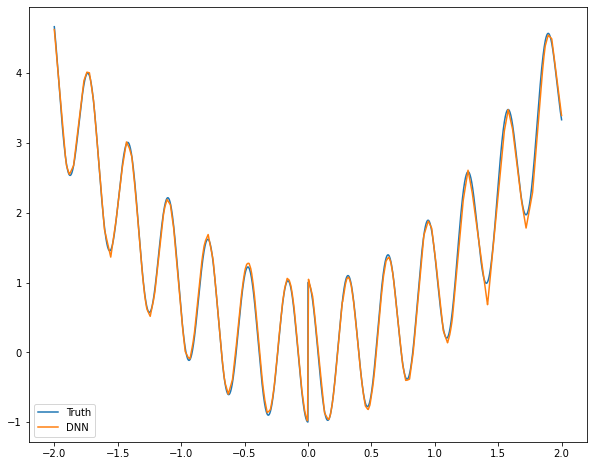

In [13]:
# Create a model with multiple hidden layers. Note that input and output has
# dimension one
M = 64
model = keras.Sequential([
    keras.layers.Dense(M, activation=tf.nn.relu, input_dim=1),
    keras.layers.Dense(M, activation=tf.nn.relu),
    keras.layers.Dense(M, activation=tf.nn.relu),
    keras.layers.Dense(M, activation=tf.nn.relu),
    keras.layers.Dense(1)
])
model.summary()

# Train the model
model.compile(loss='mean_squared_error',
              optimizer="adam",
              metrics=['accuracy'])

history = model.fit(x, f(x), epochs=1000, batch_size=128, verbose=True)

z = model.predict(x)
plt.figure(figsize=(10,8))
plt.plot(x,f(x),label="Truth")
plt.plot(x,z,label="DNN")
plt.legend()
plt.show()

## Problem 4
Using the best setup from the previous problem, train a model using the noisy data.

s 16us/sample - loss: 1.0969 - mae: 0.8365 - mse: 1.0969
Epoch 832/1000
5000/5000 [==============================] - 0s 17us/sample - loss: 1.0523 - mae: 0.8190 - mse: 1.0523
Epoch 833/1000
5000/5000 [==============================] - 0s 16us/sample - loss: 1.0696 - mae: 0.8234 - mse: 1.0696
Epoch 834/1000
5000/5000 [==============================] - 0s 17us/sample - loss: 1.0730 - mae: 0.8240 - mse: 1.0730
Epoch 835/1000
5000/5000 [==============================] - 0s 17us/sample - loss: 1.0635 - mae: 0.8216 - mse: 1.0635
Epoch 836/1000
5000/5000 [==============================] - 0s 17us/sample - loss: 1.0626 - mae: 0.8217 - mse: 1.0626
Epoch 837/1000
5000/5000 [==============================] - 0s 20us/sample - loss: 1.0732 - mae: 0.8269 - mse: 1.0732
Epoch 838/1000
5000/5000 [==============================] - 0s 16us/sample - loss: 1.0902 - mae: 0.8337 - mse: 1.0902
Epoch 839/1000
5000/5000 [==============================] - 0s 17us/sample - loss: 1.0877 - mae: 0.8335 - mse: 1.0877

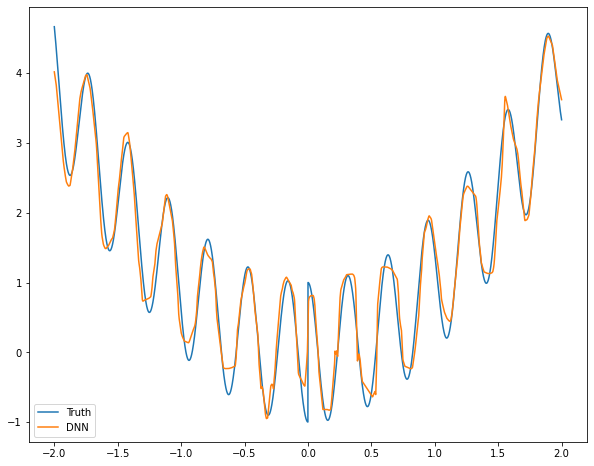

In [14]:
# Create a model with multiple hidden layers. Note that input and output has
# dimension one
M = 64
model = keras.Sequential([
    keras.layers.Dense(M, activation=tf.nn.relu, input_dim=1),
    keras.layers.Dense(M, activation=tf.nn.relu),
    keras.layers.Dense(M, activation=tf.nn.relu),
    keras.layers.Dense(M, activation=tf.nn.relu),
    keras.layers.Dense(M, activation=tf.nn.relu),
    keras.layers.Dense(M, activation=tf.nn.relu),
    keras.layers.Dense(M, activation=tf.nn.relu),
    keras.layers.Dense(M, activation=tf.nn.relu),
    keras.layers.Dense(M, activation=tf.nn.relu),
    keras.layers.Dense(M, activation=tf.nn.relu),
    keras.layers.Dense(M, activation=tf.nn.relu),
    keras.layers.Dense(M, activation=tf.nn.relu),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1)
])
model.summary()

# Train the model
model.compile(loss='mean_squared_error',
              optimizer="adam",
              metrics=['mae', 'mse'])

history = model.fit(x, y, epochs=1000, batch_size=128, verbose=True)

z = model.predict(x)
plt.figure(figsize=(10,8))
plt.plot(x,f(x),label="Truth")
plt.plot(x,z,label="DNN")
plt.legend()
plt.show()